In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import metrics

In [4]:
import statsmodels.api as sm

/Users/yuyataki/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
def logistic(t):
    return 1.0 / (1+math.exp(-1.0*t))

In [6]:
t = np.linspace(-6, 6, 500)

In [7]:
y = np.array([logistic(ele) for ele in t])

Text(0.5,1,'Logstic Function')

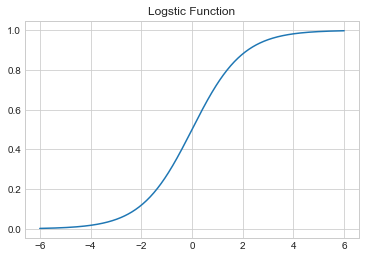

In [8]:
plt.plot(t, y)
plt.title('Logstic Function')

In [9]:
df = sm.datasets.fair.load_pandas().data

In [10]:
df.head(100)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [11]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [12]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


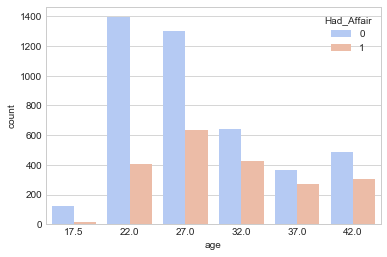

In [15]:
sns.countplot('age', data=df.sort_values('age'), hue='Had_Affair', palette='coolwarm')

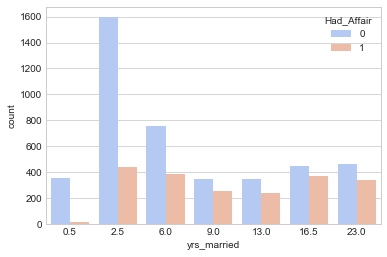

In [16]:
sns.countplot('yrs_married', data=df.sort_values('yrs_married'), hue='Had_Affair', palette='coolwarm')

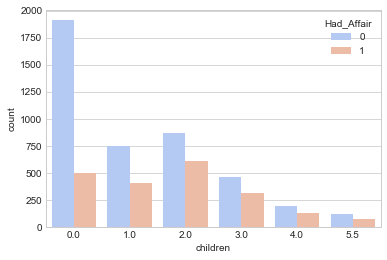

In [17]:
sns.countplot('children', data=df.sort_values('children'), hue='Had_Affair', palette='coolwarm')

In [18]:
occ_dummies = pd.get_dummies(df.occupation)

In [19]:
hus_occ_dummies = pd.get_dummies(df.occupation_husb)

In [29]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [30]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [31]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [32]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [33]:
X = pd.concat([X, dummies], axis=1)

In [34]:
X.head(9)

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174,0,0,0,0,1,0,0,0,0,1,0,0
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086,0,1,0,0,0,0,0,0,1,0,0,0
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999,0,0,1,0,0,0,0,0,1,0,0,0


In [35]:
Y = df.Had_Affair

In [28]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [36]:
X = X.drop('occ1', axis=1)

In [37]:
X = X.drop('hocc1', axis=1)

In [38]:
X = X.drop('affairs', axis=1)

In [39]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [43]:
Y.values

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
Y = np.ravel(Y)

array([1, 1, 1, ..., 0, 0, 0])

In [45]:
log_model = LogisticRegression()

In [46]:
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
log_model.score(X, Y)

0.72588752748978946

In [48]:
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [49]:
coeff_df

,0,1
0,rate_marriage,-0.697955
1,age,-0.0563789
2,yrs_married,0.10393
3,children,0.0181544
4,religious,-0.368536
5,educ,0.0087219
6,occ2,0.298034
7,occ3,0.607985
8,occ4,0.346297
9,occ5,0.942565


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [51]:
log_model2 = LogisticRegression()

In [52]:
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
class_predict = log_model2.predict(X_test)

In [54]:
class_predict

array([1, 0, 0, ..., 0, 0, 1])

In [55]:
metrics.accuracy_score(Y_test, class_predict)

0.72675879396984921